# **BUSINESS PROBLEM**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
#importing some necessary packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#to supress warning

import warnings
warnings.filterwarnings("ignore")

In [3]:
#to display all rows and columns without truncating

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#reading the dataset

original_data  = pd.read_csv(r"C:\Users\shubb\Downloads\telecom_churn_data.csv", encoding='unicode_escape')

In [5]:
#seeing the dataset to understand the data and columns

original_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
#reading another dataset containing the meaning of the columns

dict_meaning = pd.read_excel(r"C:\Users\shubb\Downloads\Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [7]:
#calling the dataset

dict_meaning

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [8]:
#checking the shape of dataset

original_data.shape

(99999, 226)

In [9]:
original_data.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [10]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [11]:
original_data.shape

(99999, 226)

In [12]:
#checking the null values percentage

round(original_data.isnull().sum()/len(original_data)*100,2).sort_values(ascending = False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [13]:
#imputing the empty values in the below columns with 0

original_data['av_rech_amt_data_6'].fillna(0, inplace=True)
original_data['total_rech_data_6'].fillna(0, inplace=True)
original_data['av_rech_amt_data_7'].fillna(0, inplace=True)
original_data['total_rech_data_7'].fillna(0, inplace=True)
original_data['av_rech_amt_data_8'].fillna(0, inplace=True)
original_data['total_rech_data_8'].fillna(0, inplace=True)
original_data['av_rech_amt_data_9'].fillna(0, inplace=True)
original_data['total_rech_data_9'].fillna(0, inplace=True)

In [14]:
#creating new variables from the existing one

original_data['total_rech_data_amount_6'] = original_data['av_rech_amt_data_6'] * original_data['total_rech_data_6'] 
original_data['total_rech_data_amount_7'] = original_data['av_rech_amt_data_7'] * original_data['total_rech_data_7'] 
original_data['total_rech_data_amount_8'] = original_data['av_rech_amt_data_8'] * original_data['total_rech_data_8'] 
original_data['total_rech_data_amount_9'] = original_data['av_rech_amt_data_9'] * original_data['total_rech_data_9']

In [15]:
#dropping the columns used above to derive new columns

original_data.drop(columns = [
    'av_rech_amt_data_6', 'total_rech_data_6',
    'av_rech_amt_data_7', 'total_rech_data_7',
    'av_rech_amt_data_8', 'total_rech_data_8',
    'av_rech_amt_data_9', 'total_rech_data_9'
], axis=1, inplace=True)

In [16]:
original_data.shape

(99999, 222)

In [17]:
original_data['total_rech_amt_6'].fillna(0, inplace=True)
original_data['total_rech_amt_7'].fillna(0, inplace=True)
original_data['total_rech_amt_8'].fillna(0, inplace=True)
original_data['total_rech_amt_9'].fillna(0, inplace=True)

In [18]:
#creating the average recharge amount for the good period

original_data['avg_total_recharge_amount_good'] = (original_data['total_rech_data_amount_6'] + original_data['total_rech_amt_6'] + original_data['total_rech_data_amount_7'] + original_data['total_rech_amt_7'])/2

In [19]:
original_data.shape

(99999, 223)

In [20]:
original_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amount_6,total_rech_data_amount_7,total_rech_data_amount_8,total_rech_data_amount_9,avg_total_recharge_amount_good
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0

# **Filter high-value customers**

As mentioned, we need to predict churn only for the high-value customers. 

Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [21]:
#finding the 70th percentile

seventy_percentile = original_data['avg_total_recharge_amount_good'].quantile(0.7)

In [22]:
seventy_percentile

478.0

In [23]:
#keeping data for good customers

original_data = original_data[original_data['avg_total_recharge_amount_good'] >= seventy_percentile]

In [24]:
original_data.shape

(30001, 223)

In [25]:
original_data.drop(columns=['avg_total_recharge_amount_good'], axis=1,inplace=True)

In [26]:
original_data.shape

(30001, 222)

# **Tag churners and remove attributes of the churn phase**

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [27]:
#creating new "churn" target variable.

original_data['churn'] = np.where(original_data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

In [28]:
original_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amount_6,total_rech_data_amount_7,total_rech_data_amount_8,total_rech_data_amount_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/20

In [29]:
original_data.shape

(30001, 223)

In [30]:
#checking type of values in the target variable

original_data.churn.value_counts()/len(original_data)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [31]:
#drop columns having -9

cols_to_drop = [col for col in original_data.columns if '_9' in col]
original_data.drop(columns=cols_to_drop, inplace=True)

In [32]:
original_data.shape

(30001, 170)

In [33]:
original_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amount_6,total_rech_data_amount_7,total_rech_data_amount_8,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/

# DATA CLEANING

In [34]:
#finding null value percent in each column

null_vals = (original_data.isnull().sum()/len(original_data)*100).sort_values(ascending=False)

In [35]:
#dropping columns with more than 40% null values

columns_to_drop = null_vals[null_vals > 40].index
original_data.drop(columns=columns_to_drop, inplace=True)

In [36]:
original_data.shape

(30001, 146)

In [37]:
#finding null value percent in each column

(original_data.isnull().sum()/len(original_data)*100).sort_values(ascending=False)

loc_ic_t2f_mou_8            3.913203
std_og_t2m_mou_8            3.913203
loc_og_t2t_mou_8            3.913203
loc_og_t2m_mou_8            3.913203
loc_og_t2f_mou_8            3.913203
std_ic_t2f_mou_8            3.913203
loc_ic_t2m_mou_8            3.913203
loc_og_mou_8                3.913203
std_og_t2t_mou_8            3.913203
std_ic_t2m_mou_8            3.913203
std_og_t2f_mou_8            3.913203
roam_og_mou_8               3.913203
std_og_t2c_mou_8            3.913203
std_ic_t2t_mou_8            3.913203
std_og_mou_8                3.913203
isd_og_mou_8                3.913203
spl_og_mou_8                3.913203
loc_ic_mou_8                3.913203
og_others_8                 3.913203
loc_ic_t2t_mou_8            3.913203
std_ic_t2o_mou_8            3.913203
loc_og_t2c_mou_8            3.913203
offnet_mou_8                3.913203
roam_ic_mou_8               3.913203
spl_ic_mou_8                3.913203
onnet_mou_8                 3.913203
ic_others_8                 3.913203
i

In [38]:
#dropping all other null values rows

original_data.dropna(inplace=True)

In [39]:
original_data.shape

(28163, 146)

In [40]:
#finding columns with only one value

unique_cols = []
for cols in original_data.columns:
    uniq = original_data[cols].nunique()
    if uniq ==1:
        unique_cols.append(cols)
        
unique_cols    

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [41]:
#dropping these columns

original_data.drop(columns=unique_cols, axis =1, inplace=True)

In [42]:
original_data.shape

(28163, 133)

In [43]:
original_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amount_6,total_rech_data_amount_7,total_rech_data_amount_8,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0.0,354.0,207.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,6/30/2014,7/31/2014,8/31/2014,30,20,50,0.00,0.00,0.00,0.0,0.00,0.00,0,

In [44]:
# mobile_number doesn't give any info so dropping that

original_data.drop('mobile_number', axis=1, inplace=True)

In [45]:
original_data.shape

(28163, 132)

In [46]:
original_data.dtypes

arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            float64
loc_og_mou_6                

In [47]:
# dropping date columns

original_data.drop(columns=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1, inplace=True)

In [48]:
original_data.dtypes

arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            float64
loc_og_mou_6                

In [49]:
#dropping the sep column

original_data.drop(columns=["sep_vbc_3g"], axis=1, inplace=True)

In [50]:
original_data.shape

(28163, 128)

In [51]:
#renaming jun,jul,aug to 6,7,8 respectively

original_data.rename(columns={'aug_vbc_3g': 'vbc_3g_8', 'jul_vbc_3g': 'vbc_3g_7', 'jun_vbc_3g': 'vbc_3g_6'}, inplace=True)

In [52]:
original_data.dtypes

arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            float64
loc_og_mou_6                

# DERIVING NEW FEATURES

In [53]:
#creating new feature variables


original_data['onnet_mou_diff'] = original_data.onnet_mou_8 - ((original_data.onnet_mou_6 + original_data.onnet_mou_7)/2)
original_data['offnet_mou_diff'] = original_data.offnet_mou_8 - ((original_data.offnet_mou_6 + original_data.offnet_mou_7)/2)
original_data['roam_ic_mou_diff'] = original_data.roam_ic_mou_8 - ((original_data.roam_ic_mou_6 + original_data.roam_ic_mou_7)/2)
original_data['roam_og_mou_diff'] = original_data.roam_og_mou_8 - ((original_data.roam_og_mou_6 + original_data.roam_og_mou_7)/2)
original_data['loc_og_mou_diff'] = original_data.loc_og_mou_8 - ((original_data.loc_og_mou_6 + original_data.loc_og_mou_7)/2)
original_data['std_og_mou_diff'] = original_data.std_og_mou_8 - ((original_data.std_og_mou_6 + original_data.std_og_mou_7)/2)
original_data['isd_og_mou_diff'] = original_data.isd_og_mou_8 - ((original_data.isd_og_mou_6 + original_data.isd_og_mou_7)/2)
original_data['spl_og_mou_diff'] = original_data.spl_og_mou_8 - ((original_data.spl_og_mou_6 + original_data.spl_og_mou_7)/2)
original_data['total_og_mou_diff'] = original_data.total_og_mou_8 - ((original_data.total_og_mou_6 + original_data.total_og_mou_7)/2)
original_data['loc_ic_mou_diff'] = original_data.loc_ic_mou_8 - ((original_data.loc_ic_mou_6 + original_data.loc_ic_mou_7)/2)
original_data['std_ic_mou_diff'] = original_data.std_ic_mou_8 - ((original_data.std_ic_mou_6 + original_data.std_ic_mou_7)/2)
original_data['isd_ic_mou_diff'] = original_data.isd_ic_mou_8 - ((original_data.isd_ic_mou_6 + original_data.isd_ic_mou_7)/2)
original_data['spl_ic_mou_diff'] = original_data.spl_ic_mou_8 - ((original_data.spl_ic_mou_6 + original_data.spl_ic_mou_7)/2)
original_data['total_ic_mou_diff'] = original_data.total_ic_mou_8 - ((original_data.total_ic_mou_6 + original_data.total_ic_mou_7)/2)

# Check total Recharge number
original_data['total_rech_num_diff'] = original_data.total_rech_num_8 - ((original_data.total_rech_num_6 + original_data.total_rech_num_7)/2)
#check total recharge amount
original_data['total_rech_amt_diff'] = original_data.total_rech_amt_8 - ((original_data.total_rech_amt_6 + original_data.total_rech_amt_7)/2)
#Check maximum recharge amount
original_data['max_rech_amt_diff'] = original_data.max_rech_amt_8 - ((original_data.max_rech_amt_6 + original_data.max_rech_amt_7)/2)
#check 2G data consumption difference in MB
original_data['vol_2g_mb_diff'] = original_data.vol_2g_mb_8 - ((original_data.vol_2g_mb_6 + original_data.vol_2g_mb_7)/2)
#Check 3G data consumption in MB
original_data['vol_3g_mb_diff'] = original_data.vol_3g_mb_8 - ((original_data.vol_3g_mb_6 + original_data.vol_3g_mb_7)/2)

In [54]:
original_data.shape

(28163, 147)

In [55]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in original_data.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    original_data[f'good_{col}'] = ( original_data[f'{col}_6'] + original_data[f'{col}_7'] ) / 2
    original_data.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)

In [56]:
original_data.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_data_amount_8,churn,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,good_loc_og_t2f_mou,good_og_others,good_loc_og_t2c_mou,good_roam_og_mou,good_sachet_2g,good_std_ic_t2f_mou,good_total_ic_mou,good_loc_og_t2t_mou,good_loc_og_t2m_mou,good_std_og_t2f_mou,good_loc_ic_mou,good_vol_3g_mb,good_isd_ic_mou,good_std_og_t2m_mou,good_monthly_3g,good_std_ic_t2m_mou,good_std_ic_t2t_mou,good_std_og_t2t_mou,good_monthly_2g,good_last_day_rch_amt,good_total_rech_num,good_vol_2g_mb,good_offnet_mou,good_roam_ic_mou,good_loc_ic_t2f_mou,good_std_ic_mou,good_loc_ic_t2t_mou,good_max_rech_amt,good_vbc_3g,good_total_og_mou,good_ic_others,good_total_rech_data_amount,good_spl_ic_mou,good_total_rech_amt,good_sachet_3g,good_std_og_mou,good_onnet_mou,good_spl_og_mou,good_arpu,good_isd_og_mou,good_loc_og_mou,good_loc_ic_t2m_mou
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,802,57.74,0.0,1,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.000,0.000,58.635,0.0,0.0,18.165,0.0,43.215,592.250,41.385,378.005,13.37,391.555,0.000,8.295,40.825,0.0,109.215,24.360,13.795,0.0,0.0,5.0,0.000,510.295,24.86,126.810,176.810,45.200,1185.0,19.060,548.385,15.465,0.0,0.105,1185.0,0.0,68.000,56.26,2.25,1209.5150,0.090,478.035,219.525
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,315,21.03,207.0,0,-347.28,48.835,0.00,0.000,-270.095,-38.590,0.000,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.0,-399.0,-92.0,-177.970,-363.535,0.000,0.0,0.0,0.000,0.5,0.000,66.175,257.360,75.770,0.00,52.630,375.475,0.000,11.865,0.0,13.255,0.290,124.995,0.5,25.0,20.0,178.000,87.645,0.00,0.000,13.545,16.840,122.0,516.405,470.010,0.000,177.0,0.000,519.0,0.0,136.870,382.36,0.00,435.4720,0.000,333.135,35.780
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.00,0,0,0,0,720,0.00,0.0,0,-32.12,156.085,0.00,0.000,34.175,89.800,0.000,0.00,123.975,52.605,38.945,0.000,0.000,91.550,3.0,78.0,0.0,0.000,0.000,0.375,0.0,0.0,0.000,0.0,0.000,169.490,5.320,89.870,0.00,106.505,0.000,0.000,737.050,0.0,52.960,10.020,111.935,0.0,25.0,24.0,0.000,827.305,0.00,3.725,62.985,6.335,50.0,0.000,944.565,0.000,0.0,0.000,640.0,0.0,848.990,117.26,0.00,556.1030,0.000,95.565,96.430
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,0.01,1009.92,0,0,1,1,604,40.45,540.0,0,-16.23,118.505,0.00,0.000,49.345,35.255,-0.005,17.66,102.270,78.690,48.375,-10.375,0.000,127.095,0.0,212.0,89.5,-0.230,710.375,0.000,0.0,0.0,0.000,0.0,0.000,171.235,49.810,82.975,0.00,145.520,299.545,14.115,4.355,1.0,8.660,0.255,

In [57]:
original_data.shape

(28163, 105)

In [58]:
#reset the index

original_data.reset_index(inplace=True, drop=True)

In [59]:
original_data.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_data_amount_8,churn,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,good_loc_og_t2f_mou,good_og_others,good_loc_og_t2c_mou,good_roam_og_mou,good_sachet_2g,good_std_ic_t2f_mou,good_total_ic_mou,good_loc_og_t2t_mou,good_loc_og_t2m_mou,good_std_og_t2f_mou,good_loc_ic_mou,good_vol_3g_mb,good_isd_ic_mou,good_std_og_t2m_mou,good_monthly_3g,good_std_ic_t2m_mou,good_std_ic_t2t_mou,good_std_og_t2t_mou,good_monthly_2g,good_last_day_rch_amt,good_total_rech_num,good_vol_2g_mb,good_offnet_mou,good_roam_ic_mou,good_loc_ic_t2f_mou,good_std_ic_mou,good_loc_ic_t2t_mou,good_max_rech_amt,good_vbc_3g,good_total_og_mou,good_ic_others,good_total_rech_data_amount,good_spl_ic_mou,good_total_rech_amt,good_sachet_3g,good_std_og_mou,good_onnet_mou,good_spl_og_mou,good_arpu,good_isd_og_mou,good_loc_og_mou,good_loc_ic_t2m_mou
0,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,802,57.74,0.0,1,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-198.225,-203.515,17.130,23.295,-0.105,-163.510,2.0,2453.0,395.0,0.000,0.000,58.635,0.0,0.0,18.165,0.0,43.215,592.250,41.385,378.005,13.37,391.555,0.000,8.295,40.825,0.0,109.215,24.360,13.795,0.0,0.0,5.0,0.000,510.295,24.86,126.810,176.810,45.200,1185.0,19.060,548.385,15.465,0.0,0.105,1185.0,0.0,68.000,56.26,2.25,1209.5150,0.090,478.035,219.525
1,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,315,21.03,207.0,0,-347.28,48.835,0.00,0.000,-270.095,-38.590,0.000,10.23,-298.450,-36.840,-12.795,0.000,0.000,-49.635,-6.0,-399.0,-92.0,-177.970,-363.535,0.000,0.0,0.0,0.000,0.5,0.000,66.175,257.360,75.770,0.00,52.630,375.475,0.000,11.865,0.0,13.255,0.290,124.995,0.5,25.0,20.0,178.000,87.645,0.00,0.000,13.545,16.840,122.0,516.405,470.010,0.000,177.0,0.000,519.0,0.0,136.870,382.36,0.00,435.4720,0.000,333.135,35.780
2,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.00,0,0,0,0,720,0.00,0.0,0,-32.12,156.085,0.00,0.000,34.175,89.800,0.000,0.00,123.975,52.605,38.945,0.000,0.000,91.550,3.0,78.0,0.0,0.000,0.000,0.375,0.0,0.0,0.000,0.0,0.000,169.490,5.320,89.870,0.00,106.505,0.000,0.000,737.050,0.0,52.960,10.020,111.935,0.0,25.0,24.0,0.000,827.305,0.00,3.725,62.985,6.335,50.0,0.000,944.565,0.000,0.0,0.000,640.0,0.0,848.990,117.26,0.00,556.1030,0.000,95.565,96.430
3,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,0.01,1009.92,0,0,1,1,604,40.45,540.0,0,-16.23,118.505,0.00,0.000,49.345,35.255,-0.005,17.66,102.270,78.690,48.375,-10.375,0.000,127.095,0.0,212.0,89.5,-0.230,710.375,0.000,0.0,0.0,0.000,0.0,0.000,171.235,49.810,82.975,0.00,145.520,299.545,14.115,4.355,1.0,8.660,0.255,0.

In [60]:
# Compute correlation matrix
correlation_matrix = original_data.corr()

# Filter pairs with correlation greater than 0.6 and less than -0.6 (not diagonal)
high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if (correlation > 0.6 or correlation < - 0.6) and i != j:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation))

print("Pairs of columns with correlation greater than 0.6 or less than -0.6 (not diagonal):")
for pair in high_correlation_pairs:
    print(pair)

Pairs of columns with correlation greater than 0.6 or less than -0.6 (not diagonal):
('arpu_8', 'total_rech_amt_8', 0.961073004936809)
('arpu_8', 'good_total_rech_amt', 0.7834186476748692)
('arpu_8', 'good_arpu', 0.7815656593605586)
('onnet_mou_8', 'std_og_t2t_mou_8', 0.8574136226176041)
('onnet_mou_8', 'std_og_mou_8', 0.6327479825896904)
('onnet_mou_8', 'total_og_mou_8', 0.7284255771113313)
('onnet_mou_8', 'good_std_og_t2t_mou', 0.6534427729755984)
('onnet_mou_8', 'good_onnet_mou', 0.7767825498037584)
('offnet_mou_8', 'std_og_t2m_mou_8', 0.8496144774510701)
('offnet_mou_8', 'std_og_mou_8', 0.6216204980651204)
('offnet_mou_8', 'total_og_mou_8', 0.7442318582215707)
('offnet_mou_8', 'good_std_og_t2m_mou', 0.6007678204824694)
('offnet_mou_8', 'good_offnet_mou', 0.7373346027990125)
('loc_og_t2t_mou_8', 'loc_og_mou_8', 0.7689388783234113)
('loc_og_t2t_mou_8', 'good_loc_og_t2t_mou', 0.815893641074182)
('loc_og_t2t_mou_8', 'good_loc_og_mou', 0.6434962120405834)
('loc_og_t2m_mou_8', 'loc_og_mo

In [61]:
#dropping variables which define other variables

columns_to_drop = []

for pair in high_correlation_pairs:
    # Decide which column to drop based on your criteria
    column_to_keep = pair[0]  # Keep the first column by default
    column_to_drop = pair[1] if pair[0] != 'good_arpu' else pair[0]  # Keep 'good_arpu' if it appears in the pair
    columns_to_drop.append(column_to_drop)

# Drop redundant columns
original_data.drop(columns_to_drop, axis=1, inplace=True)

print("Columns to drop:")
print(columns_to_drop)

Columns to drop:
['total_rech_amt_8', 'good_total_rech_amt', 'good_arpu', 'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'good_std_og_t2t_mou', 'good_onnet_mou', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'good_std_og_t2m_mou', 'good_offnet_mou', 'loc_og_mou_8', 'good_loc_og_t2t_mou', 'good_loc_og_mou', 'loc_og_mou_8', 'good_loc_og_t2m_mou', 'good_loc_og_mou', 'good_loc_og_t2f_mou', 'good_loc_og_t2t_mou', 'good_loc_og_t2m_mou', 'good_loc_og_mou', 'std_og_mou_8', 'total_og_mou_8', 'good_std_og_t2t_mou', 'good_onnet_mou', 'std_og_mou_8', 'total_og_mou_8', 'good_std_og_t2m_mou', 'good_offnet_mou', 'good_std_og_t2f_mou', 'total_og_mou_8', 'good_total_og_mou', 'good_std_og_mou', 'good_isd_og_mou', 'spl_og_mou_diff', 'good_total_og_mou', 'good_std_og_mou', 'loc_ic_mou_8', 'total_ic_mou_8', 'good_loc_ic_t2t_mou', 'loc_ic_mou_8', 'total_ic_mou_8', 'good_total_ic_mou', 'good_loc_ic_mou', 'good_loc_ic_t2m_mou', 'good_loc_ic_t2f_mou', 'total_ic_mou_8', 'good_total_ic_mou', 'good

In [62]:
original_data.shape

(28163, 53)

# EDA

In [63]:
original_data.dtypes

arpu_8                         float64
onnet_mou_8                    float64
offnet_mou_8                   float64
roam_ic_mou_8                  float64
roam_og_mou_8                  float64
loc_og_t2t_mou_8               float64
loc_og_t2m_mou_8               float64
loc_og_t2f_mou_8               float64
loc_og_t2c_mou_8               float64
std_og_t2f_mou_8               float64
isd_og_mou_8                   float64
spl_og_mou_8                   float64
og_others_8                    float64
loc_ic_t2t_mou_8               float64
loc_ic_t2m_mou_8               float64
loc_ic_t2f_mou_8               float64
std_ic_t2t_mou_8               float64
std_ic_t2m_mou_8               float64
std_ic_t2f_mou_8               float64
spl_ic_mou_8                   float64
isd_ic_mou_8                   float64
ic_others_8                    float64
total_rech_num_8                 int64
max_rech_amt_8                   int64
vol_2g_mb_8                    float64
vol_3g_mb_8              

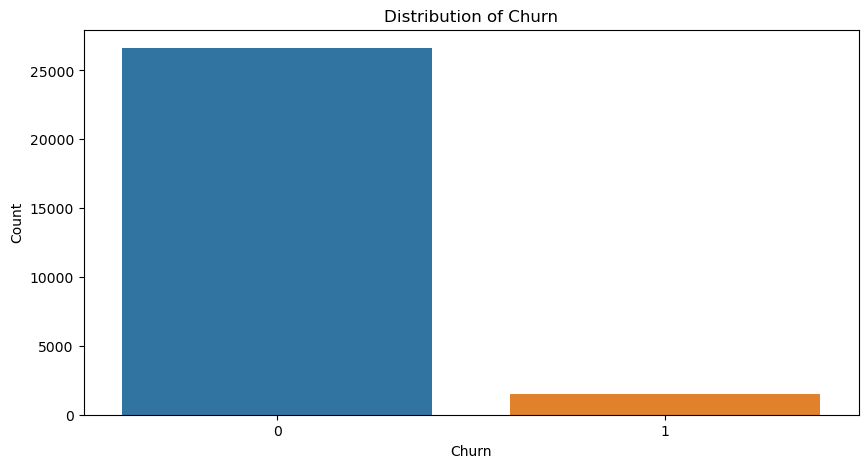

In [64]:
#plot of the churn variable

plt.figure(figsize=(10, 5))
sns.countplot(data=original_data, x='churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

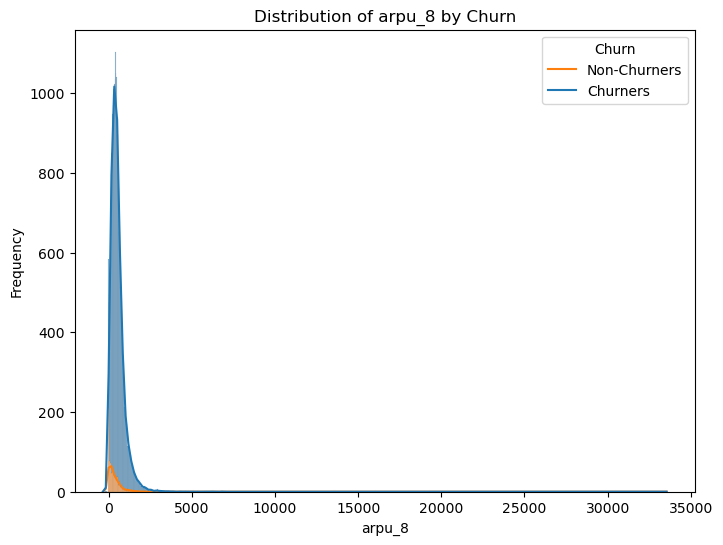

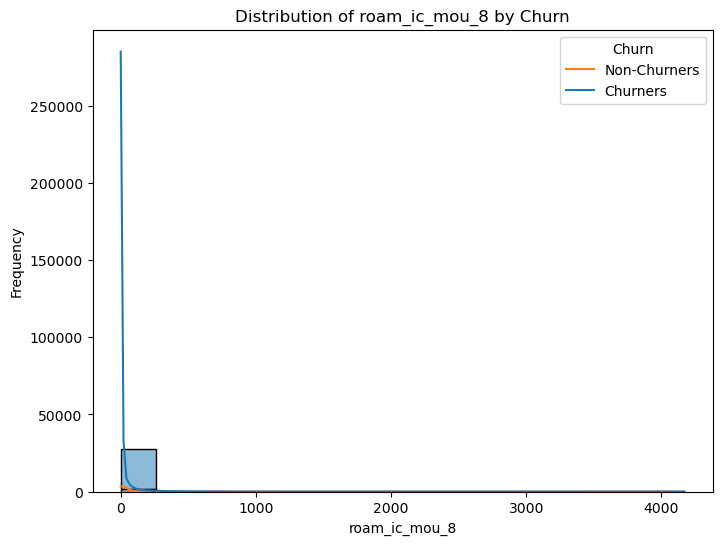

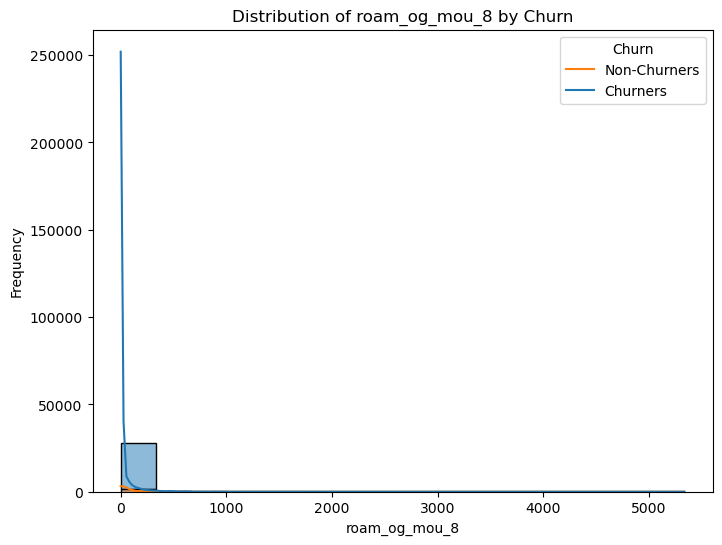

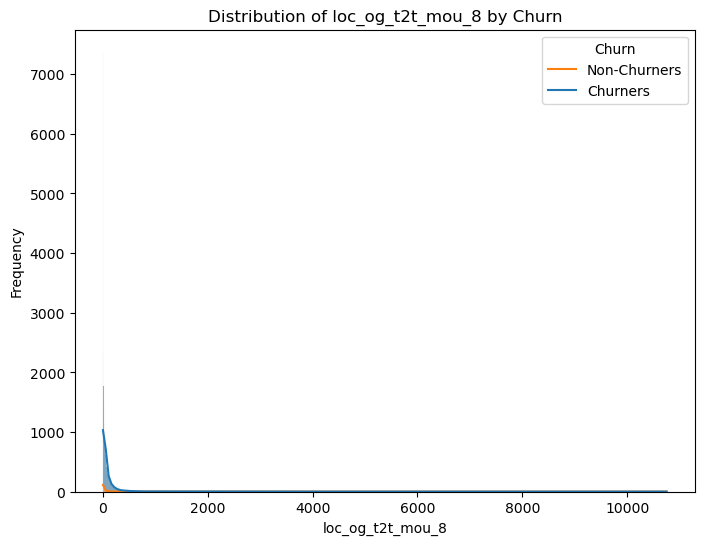

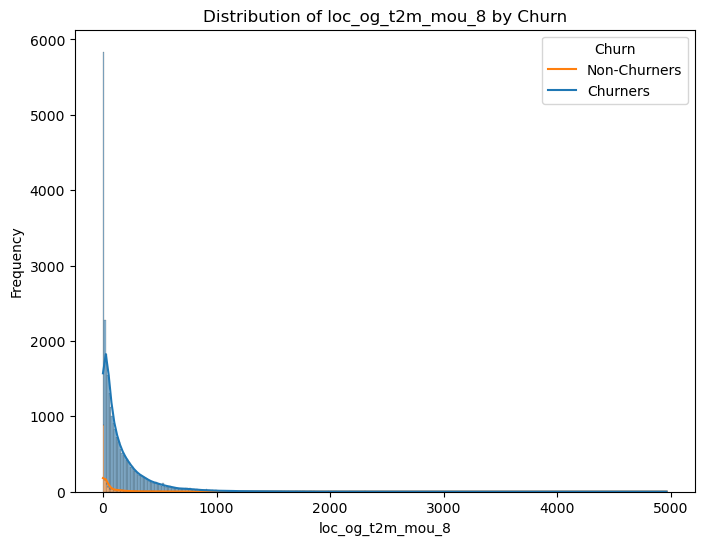

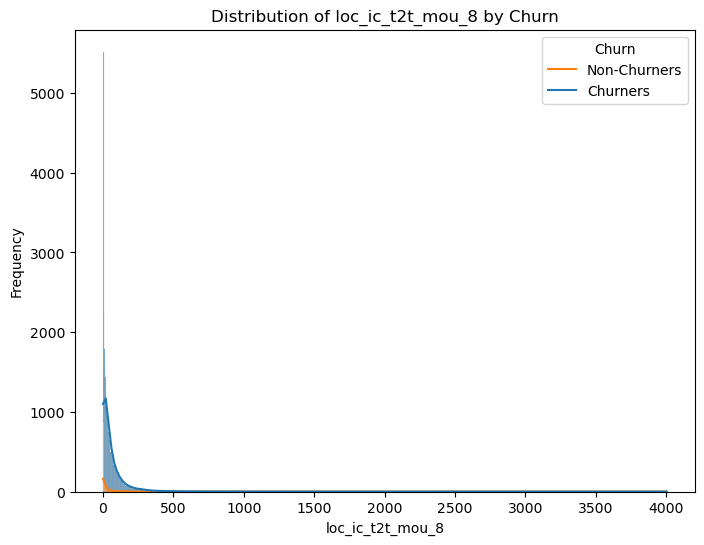

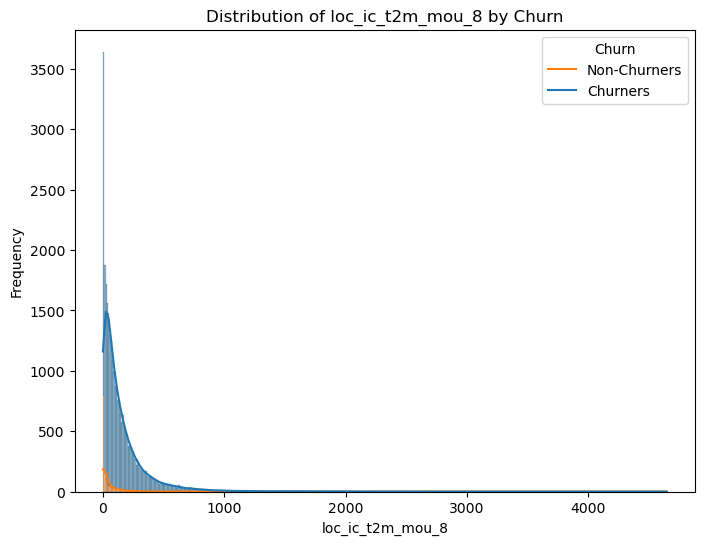

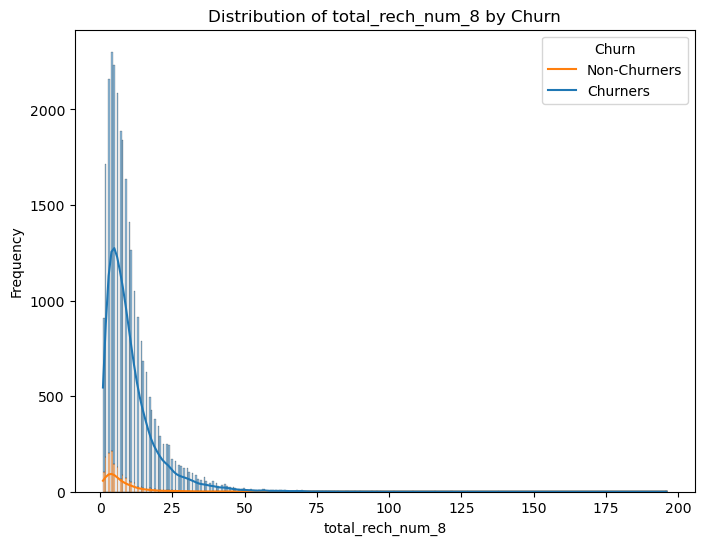

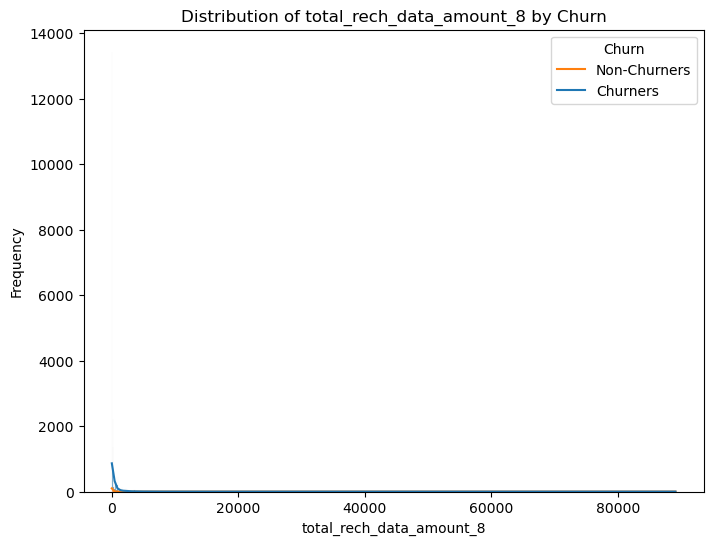

In [65]:
#histplot for some of the numerical variables wrt the target variable

for col in ['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 
                     'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'total_rech_num_8', 'total_rech_data_amount_8']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=original_data, x=col, hue='churn', kde=True, multiple='stack')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Churn', labels=['Non-Churners', 'Churners'])
    plt.show()

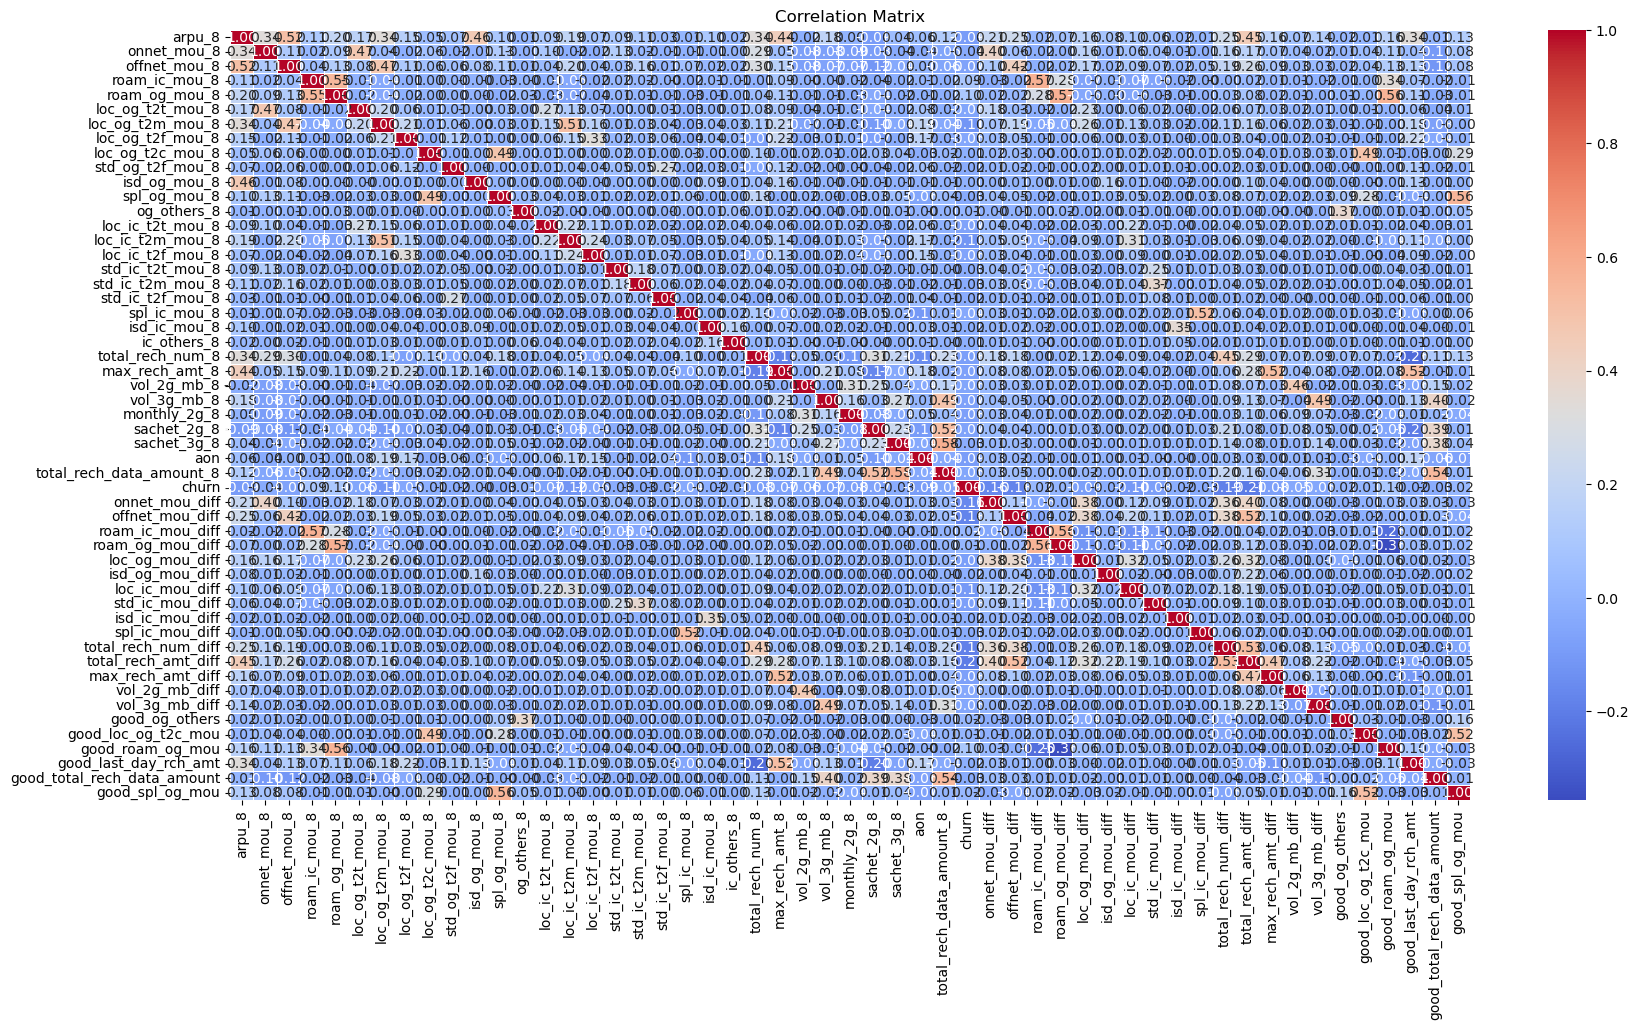

In [66]:
#heatmap for the correlation

correlation_matrix = original_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Creating X and y

In [67]:
#importing some necessary packages

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV

In [68]:
#creating X and y

X= original_data.drop(['churn'], axis=1)
y = original_data['churn']

# Standardization

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
#scaling the numerical predictors

scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
X_scale_final = pd.DataFrame(X_scaled, columns=X_col)

In [71]:
#doing the train and test split

X_train, X_test, y_train, y_test = train_test_split(X_scale_final,y, train_size=0.7,test_size=0.3,random_state=100)

In [72]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,sachet_3g_8,aon,total_rech_data_amount_8,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,isd_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,good_og_others,good_loc_og_t2c_mou,good_roam_og_mou,good_last_day_rch_amt,good_total_rech_data_amount,good_spl_og_mou
14000,-0.503891,0.061718,-0.556342,-0.17269,-0.194264,0.575744,-0.400740,-0.308871,1.293644,-0.147948,-0.043349,0.409393,-0.017873,-0.250638,-0.463753,-0.341716,-0.195781,-0.244161,-0.131485,-0.245871,-0.158254,-0.098097,-0.477541,-0.589293,-0.345594,-0.393949,-0.387862,-0.427764,-0.186557,0.025487,-0.287043,-3.198736,-0.024036,-0.772292,-0.838370,0.555666,0.004893,0.140316,-0.052868,0.000350,0.075675,-0.748061,-1.473269,-0.453475,0.069549,-0.007355,0.126523,-0.178418,0.625281,-0.379622,-0.391641,-0.124937
1271,-0.142027,-0.494835,-0.189433,-0.17269,-0.194264,-0.308630,0.154586,-0.308871,0.343772,-0.147948,-0.043349,0.279665,-0.017873,-0.295270,0.424672,-0.300552,0.022665,0.306631,1.446476,-0.245871,-0.158254,1.045946,-0.262206,-0.062701,0.234229,0.594247,2.033094,-0.039160,-0.186557,1.154301,-0.045168,0.052839,0.235748,-0.048255,-0.059730,0.189224,0.004893,0.366015,0.872177,0.000350,0.075675,0.394870,0.430823,0.025586,0.785197,-0.178606,-0.141863,2.126274,-0.161209,-0.402756,-0.186667,0.582337
6474,0.044831,0.056776,-0.040000,-0.17269,-0.194264,0.815453,0.599911,0.926537,-0.242118,-0.147948,-0.043349,-0.331013,-0.017873,0.108745,0.081052,-0.298303,-0.200301,-0.276998,-0.131485,-0.245871,-0.158254,-0.098097,-0.908212,0.209470,-0.263468,0.302528,2.033094,-0.427764,-0.186557,0.222796,-0.193921,-0.608304,-0.773988,0.022491,0.029674,-2.232174,-0.017285,-0.405797,0.012316,0.000350,0.075675,-0.748061,-0.957838,0.025586,-0.149798,0.007768,-0.141863,-0.270208,-0.251515,0.795624,-0.271940,-0.317159
7878,-0.300376,0.548068,-0.193993,-0.17269,-0.194264,-0.293635,-0.639509,-0.296311,-0.242118,-0.147948,-0.030056,-0.331013,-0.017873,-0.125571,-0.623712,-0.314723,-0.037185,-0.267213,-0.131485,-0.245871,-0.158254,-0.098097,0.276133,-0.204703,-0.345594,-0.393949,-0.387862,-0.427764,-0.186557,-1.070095,-0.287043,0.224519,-0.095446,0.022491,0.029674,0.138733,0.055945,-0.293033,-0.213920,0.000350,0.075675,0.090088,0.051756,0.488407,0.069549,-0.007355,-0.141863,-0.270208,-0.251515,-0.634104,-0.391641,-0.375365
6385,-0.825396,-0.191911,-0.671640,-0.17269,-0.194264,0.319626,-0.583976,-0.187792,-0.242118,-0.147948,-0.043349,-0.331013,-0.017873,-0.315440,-0.642883,-0.283682,-0.200301,-0.276998,-0.131485,-0.245871,-0.145802,-0.098097,-1.015879,-0.204703,-0.345594,-0.393949,-0.387862,-0.427764,-0.186557,1.029685,-0.287043,-0.294005,0.107722,0.022491,0.029674,-0.426422,0.004893,0.018344,-0.050985,0.015978,0.075675,-0.519475,-0.389863,-0.132748,0.052556,-1.302565,-0.141863,-0.270208,-0.251515,0.356063,-0.271940,-0.375365


# SMOTE

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
#as we saw, there was data imbalance so using SMOTE

smote = SMOTE(random_state=100)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [75]:
y_train_resampled.shape

(37268,)

In [76]:
y_train_resampled.value_counts()

0    18634
1    18634
Name: churn, dtype: int64

It is more important to identify churners than the non-churners accurately, so we would be focusing on RECALL.

# PCA

In [77]:
#import necessary packages

from sklearn.decomposition import PCA, IncrementalPCA

In [78]:
X_train_resampled.shape

(37268, 52)

In [79]:
#instantiate PCA

pca = PCA(random_state=49)

In [80]:
#fit on train data

pca.fit(X_train_resampled)

PCA(random_state=49)

In [81]:
# Access the principal components

pca.components_

array([[ 2.63842536e-01,  1.40228638e-01,  1.84994292e-01, ...,
         1.20718184e-01,  2.49024490e-02, -1.53036519e-02],
       [-2.29478681e-02, -2.77747434e-02, -5.11092035e-02, ...,
         7.72913261e-02, -4.78660123e-02, -5.45323661e-03],
       [ 7.95271539e-02,  3.10679879e-02,  5.23708641e-02, ...,
         1.18485744e-01, -4.27560476e-02, -4.46592733e-02],
       ...,
       [-7.68553025e-02, -4.83732331e-02, -6.74832368e-02, ...,
        -5.35836434e-02, -1.34841749e-03,  2.99894619e-04],
       [-7.12128816e-01,  2.17874749e-01,  2.40465417e-01, ...,
        -1.16821322e-02,  3.50048617e-02, -2.22346496e-03],
       [-2.10916960e-16,  1.06546380e-16, -8.08549376e-17, ...,
        -8.32667268e-17,  9.71445147e-17, -3.33066907e-16]])

In [82]:
#access the variance ratio

pca.explained_variance_ratio_

array([1.15981742e-01, 9.74506685e-02, 7.34756798e-02, 4.12184849e-02,
       3.79757976e-02, 3.73011117e-02, 3.52184587e-02, 3.15516813e-02,
       2.98213203e-02, 2.74548626e-02, 2.54621900e-02, 2.49914271e-02,
       2.35046925e-02, 2.11194177e-02, 2.03250421e-02, 2.00957838e-02,
       1.93033207e-02, 1.86867483e-02, 1.73606634e-02, 1.58253520e-02,
       1.57039472e-02, 1.44105789e-02, 1.41498303e-02, 1.32133567e-02,
       1.29664086e-02, 1.28166297e-02, 1.23394151e-02, 1.17612053e-02,
       1.15900580e-02, 1.06880542e-02, 1.01610581e-02, 9.94159314e-03,
       9.50936839e-03, 9.30123722e-03, 8.85848827e-03, 8.45055841e-03,
       8.37276941e-03, 8.22924679e-03, 8.04799938e-03, 7.54732811e-03,
       6.61661434e-03, 6.24242188e-03, 6.00010394e-03, 5.20472239e-03,
       4.40335627e-03, 4.26031967e-03, 3.76100134e-03, 3.71077125e-03,
       3.33167941e-03, 2.67230576e-03, 1.61312730e-03, 2.28733655e-32])

In [83]:
#variance ratio cumulative frequency

var_cum = np.cumsum(pca.explained_variance_ratio_)

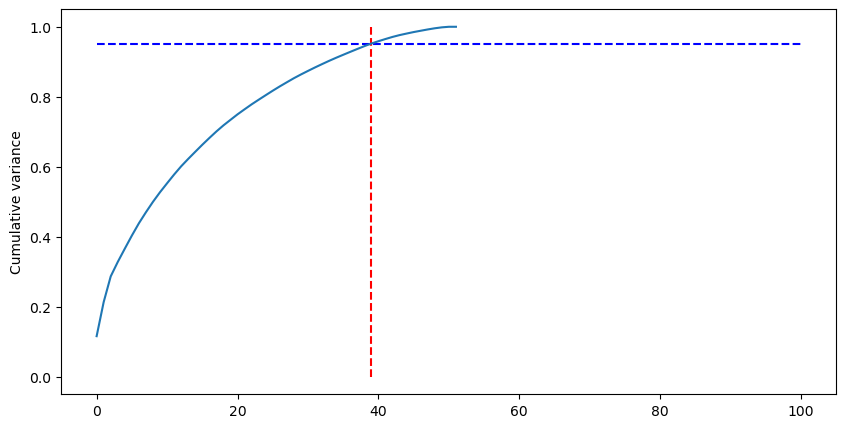

In [84]:
#plotting scree plot

fig = plt.figure(figsize=[10,5])
plt.vlines(x=39, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="b", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance")
plt.show()

We can see that around 39 components define 95% of the variance

In [85]:
# Initialize IncrementalPCA with 39 components

pca_final = IncrementalPCA(n_components=39)

In [86]:
# Transform the training data using the fitted PCA model

X_train_pca = pca_final.fit_transform(X_train_resampled)

In [87]:
X_train_pca.shape

(37268, 39)

In [88]:
#transform the test data

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8449, 39)

# LOGISTIC REGRESSION WITH PCA

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression

In [90]:
#instantiating logistic regression

logistic_regression = LogisticRegression()

In [91]:
#hyperparameters for tuning

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [92]:
#initialising grid search cv with logistic regression

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='roc_auc') 

In [93]:
#fitting the model with train data

grid_search.fit(X_train_pca, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [94]:
#finding best parameters

best_params = grid_search.best_params_

In [95]:
best_params

{'C': 100, 'penalty': 'l2'}

In [96]:
#finding best model

best_model = grid_search.best_estimator_

In [97]:
best_model

LogisticRegression(C=100)

In [98]:
#predicting on test data

y_test_predict = best_model.predict(X_test_pca)

In [101]:
#recall score

rec_log = recall_score(y_test, y_test_predict)

In [104]:
#accuracy score

acc_log = accuracy_score(y_test, y_test_predict)

In [105]:
#roc auc score

print("ROC AUC Score:", roc_auc_score(y_test, y_test_predict))

ROC AUC Score: 0.7828743198543777


# RANDOM FOREST WITH PCA

In [106]:
#instantiate random forest with oob score

ran_for = RandomForestClassifier(random_state=49, oob_score=True)

In [107]:
#creating parameter for grid

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [108]:
#Initialize RandomizedSearchCV with specified parameters

random_search_rf = RandomizedSearchCV(ran_for, param_grid, n_iter=5, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42, verbose=True)

In [109]:
#fitting the train data

random_search_rf.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=49),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='roc_auc', verbose=True)

In [110]:
#Retrieve the best parameter combination found during the search

best_params_rf = random_search_rf.best_params_

In [111]:
best_params_rf

{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}

In [112]:
#finding the best model

best_model_rf = random_search_rf.best_estimator_

In [113]:
best_model_rf

RandomForestClassifier(max_depth=10, min_samples_split=5, oob_score=True,
                       random_state=49)

In [114]:
#predicting on test data

y_test_rf_predict =  best_model_rf.predict(X_test_pca)

In [115]:
#recall

rec_ran = recall_score(y_test, y_test_rf_predict)

In [116]:
#accuracy score

acc_ran = accuracy_score(y_test, y_test_rf_predict)

In [117]:
print("ROC AUC Score for Random Forest:", roc_auc_score(y_test, y_test_rf_predict))

ROC AUC Score for Random Forest: 0.7771024061457786


In [118]:
best_model_rf.oob_score_

0.8855586562198132

# ADA WITH PCA

In [119]:
#import necessary packages for ADABOOST

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [120]:
#creating pipeline for adaboost

ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = Pipeline([('ada', ada)])

# Fit the pipeline to your training data
pipeline.fit(X_train_pca, y_train_resampled)

Pipeline(steps=[('ada', AdaBoostClassifier(n_estimators=100, random_state=42))])

In [121]:
# Make predictions

y_pred_ada = pipeline.predict(X_test_pca)

In [122]:
#recall

rec_ada = recall_score(y_test, y_pred_ada)

In [123]:
#accuracy score

acc_ada = accuracy_score(y_test, y_pred_ada)

Comparing recall of the three models

In [124]:
#creating dataframe for recall and accuracy of each of the pca combined models

data = {
    'Recall': [rec_log, rec_ran, rec_ada],
    'Accuracy': [acc_log, acc_ran, acc_ada]
}

index = ['Logistic Regression', 'Random Forest', 'AdaBoost']

# Creating DataFrame
recall_accuracy_df = pd.DataFrame(data, index=index)

In [125]:
recall_accuracy_df

,Recall,Accuracy
Logistic Regression,0.775109,0.789798
Random Forest,0.681223,0.862587
AdaBoost,0.711790,0.813351


Logistic Regression has better recall.

# RANDOM FOREST - for identifying important predictor attributes

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score

In [127]:
#instantiate and fit random forest without PCA

rand_for = RandomForestClassifier()
rand_for.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier()

In [128]:
#predicting on test dataset

y_pred = rand_for.predict(X_test)

In [129]:
#printing the recall

print(recall_score(y_test, y_pred))

0.5305676855895196


In [130]:
#feature importance for identifying important predictors

Feature_importance = pd.DataFrame({"columns":X_train_resampled.columns,"feature_importance":rand_for.feature_importances_})

In [131]:
fi = Feature_importance.sort_values(by="feature_importance",ascending=False).head(40)
fi

,columns,feature_importance
4,roam_og_mou_8,0.134411
3,roam_ic_mou_8,0.089276
42,total_rech_amt_diff,0.054272
14,loc_ic_t2m_mou_8,0.047051
30,total_rech_data_amount_8,0.040812
0,arpu_8,0.038289
6,loc_og_t2m_mou_8,0.033644
37,loc_ic_mou_diff,0.033320
34,roam_og_mou_diff,0.033216
33,roam_ic_mou_diff,0.031777


**Important Features**

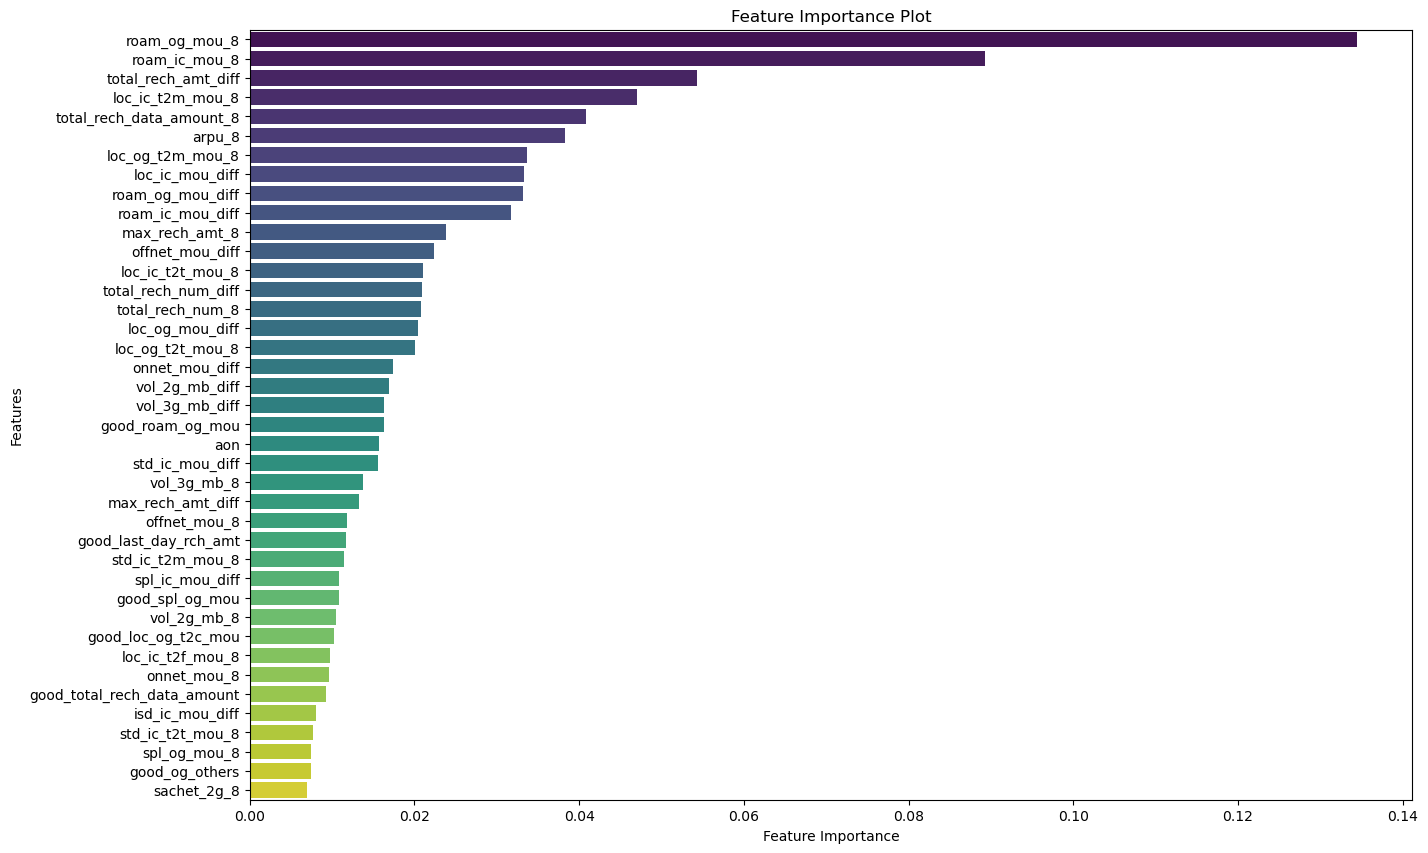

In [132]:
#plotting the important features

plt.figure(figsize=(15, 10))
sns.barplot(x='feature_importance', y='columns', data=fi, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

**Recommended strategies to manage customer churn**

Targeted Roaming Plans: Individualized roaming plans or offers catered to the usage patterns of customers with high outgoing and incoming roaming minutes of usage (roam_og_mou_8 and roam_ic_mou_8) may be advantageous. Offering special rates or packages for roaming services can encourage these clients to stick around.

Promotional Offers for Recharges: Targeted promotional offers or discounts on recharge amounts may be well-received by customers who show changes in their recharge behavior (total_rech_amt_diff, total_rech_num_diff). Offering rewards like additional call time, data, or savings on future recharges might motivate users to continue using the network.

Retention Offers for High-Value Clients: High-value clients are probably those who have greater maximum recharge amounts (max_rech_amt_8) and average revenue per user (arpu_8). Retaining these important clients can be facilitated by providing VIP services, unique loyalty awards, or first-rate customer assistance.

Engagement and Loyalty Initiatives: Putting in place engagement strategies like loyalty programs, exclusive offers, or incentives for long-term clients (aon) can increase customer loyalty and lower attrition rates.

Data consumption Optimization: To make sure they're on the best plan for their consumption requirements, customers with notable changes in their data usage (vol_2g_mb_diff, vol_3g_mb_diff) may benefit from personalized data plans or data usage optimization advice.